# Les Optimisations de mix de produits ( products mix )

## Introduction.

Les optimisations de type mix de produits sont les premières abordées en optimisation.

Elles permettent d'optimiser la production et le rendement commercial d'une usine ou d'une organisation agricole, et d'éviter en premier ressort des logiques de production aberrantes.

Elles permettent à une usine de savoir quels produits il vaut mieux produire dans son éventail de produits, afin de maximiser son profit.

On peut aussi minimiser ou maximiser d'autres paramètres dans un second temps.

Un exemple d'optimisation mixe de produits pour une entreprise de chalets
dans mon application www.solvgraph.com :
<div style="text-align:center">
<img src="img/product-mix1.png">
</div>

Dans ses versions non linéaires, elles permettent plus de sophistication et permettent de coller à la réalité.

Dans cette étude, je vais utiliser plusieurs solveurs, et faire des optimisations linéaires et non 
linéaires.

Etude globale proposée par <b>Estelle Derrien - Github estellederrien</b>

**CREATION EN COURS**


# Sommaire 

- 1. <b>Maximisation de profit linéaire.</b>
        - Notre problème de base
        - Modélisation mathématique
        - Solution avec Python Pulp
- 2. <b>A quoi sert l'analyse de sensitivité ?</b>
        - Couts réduits
        - Le Shadow price
        - Les variables slacks
- 4. <b>Ajout des coûts fixes et variables.</b>
- 5. <b>Forcer la production d'un élément.</b>
- 6. <b>Ajout de contraintes binaires/conditionnelles.</b>
    - Coûts conditionnels
        - avec Pulp
        - avec Cplex
    - Associations conditionnelles
        - avec Pulp
        - avec Cplex
- 7. <b>Ajout de "Multiples de".</b>
- 8. <b>Réductions du frais de transport en %</b>
        - description
        - avec Pulp
- 8. <b>Ajout de contraintes de coûts additionels.</b>
    - Description
    - Solution avec Python Pulp
- 9. <b>Ajout de contraintes de coûts discontinues.</b>
    - Description
    - Solution avec Python Pulp
- 10. <b>Ajout de contraintes Piecewize.</b>
    - Description
    - Solution avec Cplex
    - Solution avec Python Pulp
    - Création de fonctions piecewize à partir d'une fonction courbe
- 11. <b>Réaliser une simulation linéaire de profit avec la loi normale</b>
     - Description
     - Solution avec Python Pulp
- 12. <b>Prise en compte de la demande insatisfaite.</b>
     - Description
     - Solution avec Python Pulp
- 13. <b>Imposer des pénalités (contraintes elastiques)</b>
     - Description
     - Solution avec Pulp
- 14. <b>Optimisation MiniMax</b>
     - Description
     - Solution avec Pulp  et Gekko
    
- 15. <b>Objectifs doubles</b>
     - Description
     - Solution avec Pulp
***************************************************************************   
- 1. <b>Maximisation de profit non linéaire</b>
    - Notre problème de base
    - Graphique des coûts non linéaires.
    - Modélisation mathématique
    - Solution avec Python Gekko
        - Sans Boucle For
        - Avec Boucle For
    - Solution avec Cplex
- 2. <b>Ajout de contraintes binaires</b>
- 3. <b>Ajout de contraintes piecewize</b>




# Maximisation de profit linéaire 

# Notre problème de base.

- J'ai le choix entre 3 types de vaches: Charolaises, Blanc Bleuc et salers.

- J'ai 600 kgs de nourriture, 700 litres d'eau en stock .

- Chaque animal consomme respectivement 7kgs,7kgs,8kgs de nourriture par jour.

- Chaque animal consomme respectivement 4.5l,9l et 3l d'eau par jour.

- Chaque animal rapporte respectivement 100,110,et 115 euros.

Quels animaux faut-il élever afin de maximiser mon profit ?



# Modélisation Mathématique.

- Soit V un ensemble de animaux indicées par i (v1,v2,v3...vi)
- Soit Nij la nourriture consommée par chaque animal, c'est une matrice ( ou un tableau).
- Soit Eij l'eau consommée par chaque animal, c'est une matrice ( ou un tableau).
- Soit Pij le profit rapporté par chaque animal , c'est une matrice ( ou un tableau).
- Soit N la quantité de nourriture en stock
- Soit E la quantité d'eau en stock


Je veux maximiser mon profit  sous les contraintes de nourriture et d'eau.

Max  Σ Vi*Pij

s.t

Σ Nij*Vi <= N , ∀ n  ∈  {n1,n2,n3}

Σ Eij*Vi <= E , ∀ e  ∈  {e1,e2,e3}



# Solution avec Python Pulp

Comme on a que 3 animaux, on peut résoudre sans utiliser les itérations, qui paraissent un peu compliquées quand on débute.

In [1]:
# Importer la librairie Pulp sous le pseudo p
import pulp as p 

# Créer un programme linéaire de maximisation
Mon_Probleme = p.LpProblem('maximisation_de_profit_agricole', p.LpMaximize)  

# Créer les variables du problème, 
# On dit que ce sont des variables entières, car on ne peut pas avoir une demi vache.
charolaise = p.LpVariable("charolaise", 0, None, p.LpInteger)   
blanc_bleu = p.LpVariable("blanc_bleu", 0, None, p.LpInteger)   
salers = p.LpVariable("salers", 0, None, p.LpInteger)  

# Ecrire la fonction objectif à maximizer qui nous donne un résultat en Euros 
Mon_Probleme +=  100 * charolaise + 110 * blanc_bleu + 115 * salers

# Les contraintes : 

# nourriture
Mon_Probleme += 7 * charolaise + 7 * blanc_bleu + 8 * salers <= 600

# eau
Mon_Probleme += 4.5* charolaise + 9 * blanc_bleu + 3 * salers <= 700

# Résoudre
Mon_Probleme.solve()
# On imprime les variables qui ont leur valeur optimisées
for v in Mon_Probleme.variables():
    print(v.name, "=", v.varValue)
# La valeur de la fonction objective optimisée est imprimée à l'écran
print("Profit total maximisé = ", p.value(Mon_Probleme.objective))

blanc_bleu = 72.0
charolaise = 0.0
salers = 12.0
Profit total maximisé =  9300.0


# A quoi sert l'analyse de sensitivité ?

Le meilleur lien pour comprendre :
https://www.eit.lth.se/fileadmin/eit/courses/eitn95/2018/Labs_assignments/Sensitivity_Analysis_in_Excel.pdf

L'analyse de sensitivité permet de savoir dans quelle mesure on peut changer les paramètres de la solution apportée. Cela permet à des décideurs d'évaluer si cela vaut le coup d'augmenter le stock, par exemple.

- Les Coûts réduits:

Les coûts réduits nous indiquent de combien les coefficients de la fonction objectif (bénéfices unitaires) peuvent être augmentés ou diminués avant que la solution optimale ne change. Exemple : "Si nous augmentons le profit unitaire des sièges pour enfants avec 20 unités ou plus, la valeur optimale va changer"

- Le shadow price:

Le shadow price ou "prix fictif" en français nous indique de combien la solution optimale peut être augmentée ou diminuée si nous modifions les ressources disponibles d'une seule unité.
 ou 
Le prix fictif mesure la variation de la valeur de la fonction objectif par unité d'augmentation de la limite de la contrainte.

- Les slacks:

La quantité d'une ressource qui n'est pas utilisée. Permettent de savoir combien de ressources sont "gaspillées" ou "non utilisées". Lorsque l'on a des contraintes de stock, ces valeurs permettent de savoir la quantité de stock inutilisée.


# Afficher l'analyse de sensitivité avec Python Pulp



In [2]:
# Le bon lien : https://s3.amazonaws.com/assets.datacamp.com/production/course_8835/slides/chapter4.pdf

# Importer la librairie Pulp sous le pseudo p
import pulp as p 
import pandas as pd

# Créer un programme linéaire de maximisation
Mon_Probleme = p.LpProblem('maximisation_de_profit_agricole', p.LpMaximize)  

# Créer les variables du problème, 
# On dit que ce sont des variables entières, car on ne peut pas avoir une demi vache.
charolaise = p.LpVariable("charolaise", 0, None, p.LpInteger)   
blanc_bleu = p.LpVariable("blanc_bleu", 0, None, p.LpInteger)   
salers = p.LpVariable("salers", 0, None, p.LpInteger)  

# Ecrire la fonction objectif à maximizer qui nous donne un résultat en Euros 
# Les coûts réduits sont ici.
Mon_Probleme +=  100 * charolaise + 110 * blanc_bleu + 115 * salers

# Les contraintes : 
# Les shadow price sont ici :
# nourriture
Mon_Probleme += (7 * charolaise + 7 * blanc_bleu + 8 * salers <= 600,"Contrainte_eau")

# eau
Mon_Probleme += (4.5* charolaise + 9 * blanc_bleu + 3 * salers <= 700,"Contrainte_nourriture")

# Résoudre
Mon_Probleme.solve()
# On imprime les variables qui ont leur valeur optimisées
for v in Mon_Probleme.variables():
    print(v.name, "=", v.varValue)
# La valeur de la fonction objective optimisée est imprimée à l'écran
print("Profit total maximisé = ", p.value(Mon_Probleme.objective))
print(f"status: {Mon_Probleme.status}, {p.LpStatus[Mon_Probleme.status]}")

# Analyse de sensitivité
sensitivity_data = []
for name, constraint in Mon_Probleme.constraints.items():
    sensitivity_data.append({'Name': name,
                             'Constraint': constraint,
                             'Shadow Price': constraint.pi,
                             'Slack': constraint.slack
                             })
Modeloutput = pd.DataFrame(sensitivity_data)
print((Modeloutput))


blanc_bleu = 72.0
charolaise = 0.0
salers = 12.0
Profit total maximisé =  9300.0
status: 1, Optimal
                    Name                                   Constraint  \
0         Contrainte_eau    {charolaise: 7, blanc_bleu: 7, salers: 8}   
1  Contrainte_nourriture  {charolaise: 4.5, blanc_bleu: 9, salers: 3}   

   Shadow Price  Slack  
0          -0.0   -0.0  
1          -0.0   16.0  


# Un deuxième court exemple montrant le Shadow Price en action.

Le Shadow Price nous indique que si on incrémente de 1 la contrainte 1 qui est notre stock, on va gagner 78.14 euros en plus !
En faisant le test, cela fontionne !
(Cet exemple n'a pas de rapport avec l'exemple de base)

Auteur : Aaren Stubberfield

In [3]:

import pulp as p
model = p.LpProblem("Max_GlassCo_Profits",p.LpMaximize)
A = p.LpVariable('A', lowBound=0)
B = p.LpVariable('B', lowBound=0)
C = p.LpVariable('C', lowBound=0)
model += 500 * A + 450 * B + 600 * C
# Constraint 1
model += 6 * A + 5 * B + 8 * C <= 60
# Constraint 2
model += 10.5 * A + 20 * B + 10 * C <= 150
# Constraint 3
model += A <= 8
# Solve Model
model.solve()
print("Model Status:{}".format(p.LpStatus[model.status]))
print("Objective = ", p.value(model.objective))
for v in model.variables():
    print(v.name, "=", v.varValue)
# Analyse de sensitivité
sensitivity_data = []
for name, constraint in model.constraints.items():
    sensitivity_data.append({'Name': name,
                             'Constraint': constraint,
                             'Shadow Price': constraint.pi,
                             'Slack': constraint.slack
                             })
Modeloutput = pd.DataFrame(sensitivity_data)
print((Modeloutput))

Model Status:Optimal
Objective =  5133.333350000001
A = 6.6666667
B = 4.0
C = 0.0
  Name               Constraint  Shadow Price     Slack
0  _C1       {A: 6, B: 5, C: 8}     78.148148 -0.000000
1  _C2  {A: 10.5, B: 20, C: 10}      2.962963 -0.000000
2  _C3                   {A: 1}     -0.000000  1.333333


# Ajout des coûts fixes et variables.

Revenons à notre problème de base, mon exploitation a un coût fixe de 1200 euros.
Chaque animal implique un coût variable de respectivement 10,12 et 9.5 euros.

Je veux inclure ces éléments à la fonction objectif afin qu'elle les prenne en compte lors de l'optimisation.

Note:  On est toujours dans le cadre d'un problème linéaire, les coûts variables des animaux est donc proportionnel au nombre d'animaux, chaque animal a un coût fixe directement appliqué, il ne diminue pas ou ne varie pas avec le nombre, si c'était le cas, on serait dans un problème non linéaire.

In [4]:
# Importer la librairie Pulp sous le pseudo p
import pulp as p 

# Nos coûts
cout_fixe = 1000
cout_charolaise = 10
cout_blanc_bleu = 12
cout_salers = 9.5

# Créer un programme linéaire de maximisation
Mon_Probleme = p.LpProblem('maximisation_de_profit_agricole', p.LpMaximize)  

# Créer les variables du problème 
charolaise = p.LpVariable("charolaise", 0, None, p.LpInteger)   
blanc_bleu = p.LpVariable("blanc_bleu", 0, None, p.LpInteger)   
salers = p.LpVariable("salers", 0, None, p.LpInteger)   

# Ecrire la fonction objectif à maximizer qui nous donne un résultat en Euros 
Mon_Probleme +=  ((100 - cout_charolaise)  * charolaise + (110 - cout_blanc_bleu) * blanc_bleu + 
             (115 - cout_salers) * salers ) - cout_fixe

# Les contraintes : 

# nourriture
Mon_Probleme += 7 * charolaise + 7 * blanc_bleu + 8 * salers <= 600

# eau
Mon_Probleme += 4.5* charolaise + 9 * blanc_bleu + 3 * salers <= 700

# Résoudre
Mon_Probleme.solve()
# On imprime les variables qui ont leur valeur optimisées
for v in Mon_Probleme.variables():
    print(v.name, "=", v.varValue)
# La valeur de la fonction objective optimisée est imprimée à l'écran
print("Profit total maximisé = ", p.value(Mon_Probleme.objective))

blanc_bleu = 72.0
charolaise = 0.0
salers = 12.0
Profit total maximisé =  7322.0


# Forcer la production d'un élément.

On voit dans notre résultat que le solveur nous dit de ne pas produire de charolaises, afin de maximiser notre profit.
Mais je veux tout de même avoir 20 Charolaises au minimum dans mon cheptel et 20 salers au minimum, même si cela implique une perte de profit.


In [5]:
# Importer la librairie Pulp sous le pseudo p
import pulp as p 

# Nos coûts
cout_fixe = 1000
cout_charolaise = 10
cout_blanc_bleu = 12
cout_salers = 9.5

# Créer un programme linéaire de maximisation
Mon_Probleme = p.LpProblem('maximisation_de_profit_agricole', p.LpMaximize)  

# Créer les variables du problème 
charolaise = p.LpVariable("charolaise", 0, None, p.LpInteger)   
blanc_bleu = p.LpVariable("blanc_bleu", 0, None, p.LpInteger)   
salers = p.LpVariable("salers", 0, None, p.LpInteger)   

# Ecrire la fonction objectif à maximizer qui nous donne un résultat en Euros 
Mon_Probleme +=  ((100 - cout_charolaise)  * charolaise + (110 - cout_blanc_bleu) * blanc_bleu + 
             (115 - cout_salers) * salers ) - cout_fixe

# Les contraintes : 
# nourriture
Mon_Probleme += 7 * charolaise + 7 * blanc_bleu + 8 * salers <= 600
# eau
Mon_Probleme += 4.5* charolaise + 9 * blanc_bleu + 3 * salers <= 700

# Minimum de 20 charolaises
Mon_Probleme += charolaise >= 20

# Minimum de 20 salers
Mon_Probleme += salers >= 20

# Résoudre
Mon_Probleme.solve()
# On imprime les variables qui ont leur valeur optimisées
for v in Mon_Probleme.variables():
    print(v.name, "=", v.varValue)
# La valeur de la fonction objective optimisée est imprimée à l'écran
print("Profit total maximisé = ", p.value(Mon_Probleme.objective))

blanc_bleu = 36.0
charolaise = 20.0
salers = 26.0
Profit total maximisé =  7071.0


# Ajout de contrainte conditionnelle. (1)

Je veux que si mon cheptel d'animaux de type blanc_bleu dépasse les 30 unités, un coût additionnel de main d'oeuvre de 30 euros soies appliqué.

In [6]:
# Importer la librairie Pulp sous le pseudo p
import pulp as p 

# Nos coûts
cout_fixe = 1000
cout_charolaise = 10
cout_blanc_bleu = 12
cout_salers = 9.5

# Créer un programme linéaire de maximisation
Mon_Probleme = p.LpProblem('maximisation_de_profit_agricole', p.LpMaximize)  

# Créer les variables du problème 
charolaise = p.LpVariable("charolaise", 0, None, p.LpInteger)   
blanc_bleu = p.LpVariable("blanc_bleu", 0, None, p.LpInteger)   
salers = p.LpVariable("salers", 0, None, p.LpInteger) 

# Variable binaire On/Off
depassement_blanc_bleu =   p.LpVariable("depassement_blanc_bleu", 0, None, p.LpBinary)

# Ecrire la fonction objectif à maximizer qui nous donne un résultat en Euros 
Mon_Probleme +=  ((100 - cout_charolaise)  * charolaise + (110 - cout_blanc_bleu) * 
             blanc_bleu + (115 - cout_salers) * salers ) - cout_fixe -  30 * depassement_blanc_bleu

# Les contraintes : 
# nourriture
Mon_Probleme += 7 * charolaise + 7 * blanc_bleu + 8 * salers <= 600
# eau
Mon_Probleme += 4.5* charolaise + 9 * blanc_bleu + 3 * salers <= 700
# Minimum de 20 charolaises
Mon_Probleme += charolaise >= 20
# Minimum de 20 salers
Mon_Probleme += salers >= 20

# La variable binaire
# Si mon cheptel de blanc_bleu dépasse 30, alors la variable binaire est à 1 et le
# coût de 30 est soustrait de la fonction objectif, attention, c'est pris en compte
# en cours d'optimisation.
M = 1000  # M se calcule selon une certaine méthode ( BigM)
# si blanc_bleu > 30 alors z = 1 s'écrit comme cela avec PULP
Mon_Probleme += depassement_blanc_bleu  >= (blanc_bleu - 30 )/M

# Résoudre
Mon_Probleme.solve()
# On imprime les variables qui ont leur valeur optimisées
for v in Mon_Probleme.variables():
    print(v.name, "=", v.varValue)
# La valeur de la fonction objective optimisée est imprimée à l'écran
print("Profit total maximisé = ", p.value(Mon_Probleme.objective))

blanc_bleu = 36.0
charolaise = 20.0
depassement_blanc_bleu = 1.0
salers = 26.0
Profit total maximisé =  7041.0


# Ajout de contrainte conditionnelle. (2)

Je veux que si mon cheptel d'animaux de type blanc_bleu dépasse les 30 unités, un coût additionnel de main d'oeuvre de 30 euros soies appliqué.
Cette fois ci, on résouds avec le solveur <b>Python Cplex</b>, qui permet d'exprimer les contraintes conditionnelles très naturellement ( Mais il est payant..).

In [7]:
import cplex
import docplex.mp
from docplex.mp.model import Model

# Nos coûts
cout_fixe = 1000
cout_charolaise = 10
cout_blanc_bleu = 12
cout_salers = 9.5

# On crée notre modèle
model = Model(name='maximisation_de_profit_agricole', log_output=True)

# On crée nos variables de décision
charolaise = model.integer_var(name='charolaise')
blanc_bleu = model.integer_var(name='blanc_bleu')
salers = model.integer_var(name='salers ')
depassement_blanc_bleu = model.binary_var(name='depassement_blanc_bleu')

# On crée la fonction objectif
model.maximize(((100 - cout_charolaise)  * charolaise + (110 - cout_blanc_bleu) * 
             blanc_bleu + (115 - cout_salers) * salers ) - cout_fixe -  30 * depassement_blanc_bleu)

# On crée les contraintes
model.add_constraint(7 * charolaise + 7 * blanc_bleu + 8 * salers <= 600)
model.add_constraint(4.5* charolaise + 9 * blanc_bleu + 3 * salers <= 700)
model.add_constraint(charolaise >= 20)
model.add_constraint(salers >= 20)


# On spécifie le déclencheur de la contrainte depassement_blanc_bleu, 
# qui dit que si la production de animaux blanc_bleu dépasse 30, 
# alors le coût de 30 euros est soustrait dans la fonction objectif
#if then constraint
model.add_constraint(model.if_then(blanc_bleu >= 30, depassement_blanc_bleu == 1))


model.parameters.mip.display.set(0)
sol_model = model.solve()
model.print_solution()


Version identifier: 22.1.1.0 | 2023-02-09 | 22d6266e5
CPXPARAM_Read_DataCheck                          1
CPXPARAM_MIP_Display                             0
objective: 7041.000
status: OPTIMAL_SOLUTION(2)
  "charolaise"=20
  "blanc_bleu"=36
  "salers "=26
  "depassement_blanc_bleu"=1


# Associations conditionnelles (Avec Pulp)

Si les animaux de type blancs bleus dépassent 20, alors les animaux salers doivent dépasser 15.


In [8]:
# Importer la librairie Pulp sous le pseudo p
import pulp as p 

# Nos coûts
cout_fixe = 1000
cout_charolaise = 10
cout_blanc_bleu = 12
cout_salers = 9.5

# Créer un programme linéaire de maximisation
Mon_Probleme = p.LpProblem('maximisation_de_profit_agricole', p.LpMaximize)  

# Créer les variables du problème 
charolaise = p.LpVariable("charolaise", 0, None, p.LpInteger)   
blanc_bleu = p.LpVariable("blanc_bleu", 0, None, p.LpInteger)   
salers = p.LpVariable("salers", 0, None, p.LpInteger) 

# Variable binaire On/Off
association =   p.LpVariable("association", 0, None, p.LpBinary)

# Ecrire la fonction objectif à maximizer qui nous donne un résultat en Euros 
Mon_Probleme +=  ((100 - cout_charolaise)  * charolaise + (110 - cout_blanc_bleu) * 
             blanc_bleu + (115 - cout_salers) * salers ) - cout_fixe 

# Les contraintes : 
# nourriture
Mon_Probleme += 7 * charolaise + 7 * blanc_bleu + 8 * salers <= 600
# eau
Mon_Probleme += 4.5* charolaise + 9 * blanc_bleu + 3 * salers <= 700
# Minimum de 20 charolaises
Mon_Probleme += charolaise >= 20
# Si le nobre de blanc_bleu dépasse 20, alors, il  doit y avoir au moins 15 vaches salers
Mon_Probleme += salers >= association * 15

# Setting de la variable binaire avec la méthode BigM
M = 1000  
Mon_Probleme += association  >= (blanc_bleu - 20 )/M

# Résoudre
Mon_Probleme.solve()
# On imprime les variables qui ont leur valeur optimisées
for v in Mon_Probleme.variables():
    print(v.name, "=", v.varValue)
# La valeur de la fonction objective optimisée est imprimée à l'écran
print("Profit total maximisé = ", p.value(Mon_Probleme.objective))

association = 1.0
blanc_bleu = 44.0
charolaise = 20.0
salers = 19.0
Profit total maximisé =  7116.5


# Associations conditionnelles (Avec Cplex)

Si les animaux de type  blancs bleus dépassent 20, alors les animaux de type salers doivent dépasser 15.

In [9]:
# A venir ...

# Réduction de frais de transport en %

Les frais de transport sont de 5 euros par animal moins une réduction de 20% pour x animaux, donc si x = 100, les frais de transport sont de 400.
5 * x -  ( 5 * x * 20 / 100)


Voyons cela en graphique :

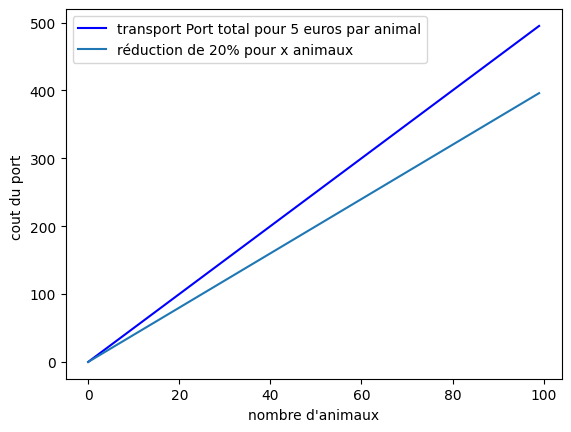

In [10]:
import matplotlib.pyplot as plt
import math

x_cords = range(0,100)

# les frais de transport sont de 5 euros par animal
y_lin = [x * 5 for x in x_cords]

# les frais de transport sont de 5 euros par objet moins une réduction de 20% pour x
y_cords = [ 5 * x -  ( 5 * x * 20 / 100) for x in x_cords] 

plt.plot(x_cords, y_lin, "-b", label="transport Port total pour 5 euros par animal")
plt.plot(x_cords, y_cords, label="réduction de 20% pour x animaux")

plt.xlabel("nombre d'animaux")
plt.ylabel("cout du port ")
plt.legend(loc="upper left")
plt.show()

In [11]:
# Importer la librairie Pulp sous le pseudo p
import pulp as p 

frais_port = 5

# Créer un programme linéaire de maximisation
Mon_Probleme = p.LpProblem('maximisation_de_profit_agricole', p.LpMaximize)  

# Créer les variables du problème, 
# On dit que ce sont des variables entières, car on ne peut pas avoir une demi vache.
charolaise = p.LpVariable("charolaise", 0, None, p.LpInteger)   
blanc_bleu = p.LpVariable("blanc_bleu", 0, None, p.LpInteger)   
salers = p.LpVariable("salers", 0, None, p.LpInteger)  

# Ecrire la fonction objectif à maximizer qui nous donne un résultat en Euros 
Mon_Probleme +=  (100 * charolaise - (frais_port * charolaise - ( frais_port * charolaise * 20 / 100))) 
+ ( 110 * blanc_bleu - ( frais_port * blanc_bleu - ( frais_port * blanc_bleu * 20 / 100)))
+ ( 115 * salers - (frais_port * salers - ( frais_port * salers * 20 / 100))) 

# Les contraintes : 

# nourriture
Mon_Probleme += 7 * charolaise + 7 * blanc_bleu + 8 * salers <= 600

# eau
Mon_Probleme += 4.5* charolaise + 9 * blanc_bleu + 3 * salers <= 700

# Résoudre
Mon_Probleme.solve()
# On imprime les variables qui ont leur valeur optimisées
for v in Mon_Probleme.variables():
    print(v.name, "=", v.varValue)
# La valeur de la fonction objective optimisée est imprimée à l'écran
print("Profit total maximisé = ", p.value(Mon_Probleme.objective))

blanc_bleu = 0.0
charolaise = 85.0
salers = 0.0
Profit total maximisé =  8160.0


# Ajout de "multiple de "

On revient sur notre problème de base,

On va ajouter une contrainte qui dit que pour tout animal de type Blanc bleu produite, alors il faut produire 2 animaux de type salers.

In [12]:
# Importer la librairie Pulp sous le pseudo p
import pulp as p 

# Créer un programme linéaire de maximisation
Mon_Probleme = p.LpProblem('maximisation_de_profit_agricole', p.LpMaximize)  

# Créer les variables du problème, 
# On dit que ce sont des variables entières, car on ne peut pas avoir une demi vache.
charolaise = p.LpVariable("charolaise", 0, None, p.LpInteger)   
blanc_bleu = p.LpVariable("blanc_bleu", 0, None, p.LpInteger)   
salers = p.LpVariable("salers", 0, None, p.LpInteger)  

# Ecrire la fonction objectif à maximizer qui nous donne un résultat en Euros 
Mon_Probleme +=  100 * charolaise + 110 * blanc_bleu + 115 * salers

# Les contraintes : 

# nourriture
Mon_Probleme += 7 * charolaise + 7 * blanc_bleu + 8 * salers <= 600

# eau
Mon_Probleme += 4.5* charolaise + 9 * blanc_bleu + 3 * salers <= 700

# Contrainte de multiplicité :
# 1 charolaise produite, on doit avoir 2 salers
Mon_Probleme += charolaise  * 2 == salers

# Résoudre
Mon_Probleme.solve()
# On imprime les variables qui ont leur valeur optimisées
for v in Mon_Probleme.variables():
    print(v.name, "=", v.varValue)
# La valeur de la fonction objective optimisée est imprimée à l'écran
print("Profit total maximisé = ", p.value(Mon_Probleme.objective))

blanc_bleu = 72.0
charolaise = 4.0
salers = 8.0
Profit total maximisé =  9240.0


# Ajout de contraintes de coûts additives

- Si la production d'animal de type blanc_bleu > 0, alors le côut de maintenance est de 20
- Si la production d'animal de type > 20, alors le côut de maintenance est de 30 euros supplémentaires 
- Si la production d'animal de type > 50, alors le côut de maintenance est de 30 euros supplémentaires

In [13]:
import cplex
import docplex.mp
from docplex.mp.model import Model
from docplex.util.environment import get_environment

# On crée notre modèle
model = Model(name='maximisation_de_profit_agricole', log_output=True)

# On crée nos variables de décision
charolaise = model.integer_var(name='charolaise')
blanc_bleu = model.integer_var(name='blanc_bleu')
salers = model.integer_var(name='salers ')
# Les variables binaires
depassement_0 = model.binary_var(name='depassement_0')
depassement_20 = model.binary_var(name='depassement_20')
depassement_50 = model.binary_var(name='depassement_50')

# On crée la fonction objectif
model.maximize(100 * charolaise + 110 * blanc_bleu + 115 * salers 
               - depassement_0 * 20 - depassement_20 * 30 - depassement_50 * 50) 

# On crée les contraintes
model.add_constraint(7 * charolaise + 7 * blanc_bleu + 8 * salers <= 600)
model.add_constraint(4.5* charolaise + 9 * blanc_bleu + 3 * salers <= 700)


# Contraintes de coûts additives
# On crée les contraintes binaires qui vont activer ou pas les couts dans la fonction objectif
model.add_constraint(model.if_then(blanc_bleu >= 0, depassement_0 == 1))
model.add_constraint(model.if_then(blanc_bleu >= 20, depassement_20 == 1))
model.add_constraint(model.if_then(blanc_bleu >= 50, depassement_50 == 1))

model.parameters.mip.display.set(0)
sol_model = model.solve()
model.print_solution()

Version identifier: 22.1.1.0 | 2023-02-09 | 22d6266e5
CPXPARAM_Read_DataCheck                          1
CPXPARAM_MIP_Display                             0
objective: 9200
status: OPTIMAL_SOLUTION(2)
  "blanc_bleu"=72
  "salers "=12
  "depassement_0"=1
  "depassement_20"=1
  "depassement_50"=1


# Ajout de contraintes discontinues.

# Description :

- Si la production d'animal de type blanc_bleu > 0, alors le côut de maintenance est de 20
- Si la production d'animal de type blanc_bleu > 20, alors le côut de maintenance est de 30 euros
- Si la production d'animal de type blanc_bleu > 50, alors le côut de maintenance est de 50 euros 

- Note importante :
Les coûts sont toujours pris en compte lors de l'optimisation, lorsque le simplexe est exécuté.
C'est à dire que le solveur prends en compte les coûts fixes cités plus haut et du coup, risque de choisir moins d'animal de type blanc bleus.

# Graphique de nos contraintes discontinues.


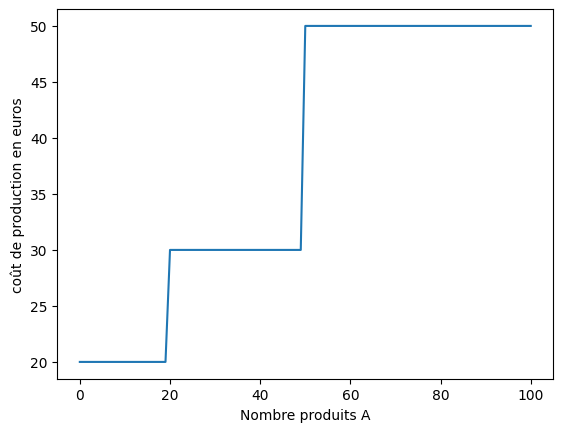

In [14]:
import matplotlib.pyplot as plt
plt.plot([0, 19, 20, 49,50,100], [20,20,30, 30, 50 ,50])
plt.xlabel('Nombre produits A')
plt.ylabel('coût de production en euros')
plt.show()

# Solution avec Python Cplex

In [15]:
import cplex
import docplex.mp
from docplex.mp.model import Model
from docplex.util.environment import get_environment

# On crée notre modèle
model = Model(name='maximisation_de_profit_agricole', log_output=True)

# On crée nos variables de décision
charolaise = model.integer_var(name='charolaise')
blanc_bleu = model.integer_var(name='blanc_bleu')
salers = model.integer_var(name='salers ')

# On définit la fonction piecewize de type discontinue
f = model.piecewise(0, [(0, 20), (20, 30), (50, 50)],1)

# On crée la fonction objectif
# On maximise moins les coûts provenant de la fonction piecewize f(x)
model.maximize(100 * charolaise + 110 * blanc_bleu  + 115 * salers - f(blanc_bleu)) 

# On crée les contraintes
model.add_constraint(7 * charolaise + 7 * blanc_bleu + 8 * salers <= 600)
model.add_constraint(4.5* charolaise + 9 * blanc_bleu + 3 * salers <= 700)

# Résoudre
model.parameters.mip.display.set(0)
sol_model = model.solve()
model.print_solution()

Version identifier: 22.1.1.0 | 2023-02-09 | 22d6266e5
CPXPARAM_Read_DataCheck                          1
CPXPARAM_MIP_Display                             0


objective: 9228.000
status: OPTIMAL_SOLUTION(2)
  "blanc_bleu"=72
  "salers "=12


# Ajout de contraintes piecewize

Les contraintes piecewize permettent de linéariser une fonction non linéaire.

## Avec Python Pulp

Exprimer les contraintes piecewize avec Python Pulp est beaucoup plus difficile qu'avec Python Cplex, Code à venir !

# Solution avec Python Cplex

Il existe 2 méthodes, on choisit celle avec les breakpoints. 
(Voir le lien https://ibmdecisionoptimization.github.io/tutorials/html/Beyond_Linear_Programming.html)

Le coût de production est proportionnel au nombre d'animal de type blanc_bleu produit, 
mais il différe par "à coups" selon certains seuils.
On décompose cela en fonctions piecewize, et on se sert de Python Cplex pour résoudre et afficher le graphique des fonctions de coût piecewize.

Version identifier: 22.1.1.0 | 2023-02-09 | 22d6266e5
CPXPARAM_Read_DataCheck                          1
CPXPARAM_MIP_Display                             0


charolaise  =  0
blanc_bleu  =  72.0
salers   =  12.0
_pwl3  =  52.2
solution for: maximisation_de_profit_agricole
objective: 9247.8
status: OPTIMAL_SOLUTION(2)
blanc_bleu=72
salers =12



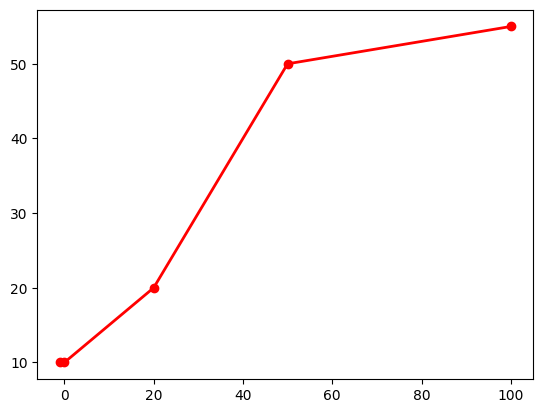

In [16]:
import cplex
import docplex.mp
from docplex.mp.model import Model


# On crée notre modèle
model = Model(name='maximisation_de_profit_agricole', log_output=True)

# On crée nos variables de décision
charolaise = model.integer_var(name='charolaise')
blanc_bleu = model.integer_var(name='blanc_bleu')
salers = model.integer_var(name='salers ')

# On crée les fonctions piecewize avec leur breakpoints
pwf2 = model.piecewise(preslope=0, breaksxy=[(0, 10), (20, 20), (50, 50)], postslope=0.1)


# On crée cette contrainte pour contrôler 
# si les couts piecewize fonctionnent quand on change la valeur
# model.add_constraint(a  <= 1000)

# On crée la fonction objectif
# On maximise notre profit, moins les couts de type piecewize
model.maximize(100 * charolaise + 110 * blanc_bleu  + 115 * salers - pwf2(blanc_bleu)) 

# On crée les contraintes
model.add_constraint(7 * charolaise + 7 * blanc_bleu + 8 * salers <= 600)
model.add_constraint(4.5* charolaise + 9 * blanc_bleu + 3 * salers <= 700)

model.parameters.mip.display.set(0)
model.solve()

for v in model.iter_integer_vars():
    print(v," = ",v.solution_value) 

for v in model.iter_continuous_vars():
    print(v," = ",v.solution_value) 

for v in model.iter_binary_vars():
    print(v," = ",v.solution_value) 

print(model.solution)

# On dessine les fonctions de couts piecewize
pwf2.plot(lx=-1, rx=100, k=1, color='r', marker='o', linewidth=2)

#     - Création de fonctions piecewize à partir d'une fonction convexe

On regarde cette librairie, pwlf :
https://jekel.me/piecewise_linear_fit_py/examples.html#fit-with-known-breakpoint-locations

Ceci dépasse le cadre de ce notebook, mais c'est une voie pour récupérer les breakpoints, afin d'ensuite créer une optimisation linéaire.
A voir si il n'existe pas une solution plus simple.


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pwlf

# your data
y = np.array([0.00000000e+00, 9.69801700e-03, 2.94350340e-02,              4.39052750e-02, 5.45343950e-02, 6.74104940e-02,              8.34831790e-02, 1.02580042e-01, 1.22767939e-01,              1.42172312e-01, 0.00000000e+00, 8.58600000e-06,              8.31543400e-03, 2.34184100e-02, 3.39709150e-02,              4.03581990e-02, 4.53545600e-02, 5.02345260e-02,              5.55253360e-02, 6.14750770e-02, 6.82125120e-02,              7.55892510e-02, 8.38356810e-02, 9.26413070e-02,              1.02039790e-01, 1.11688258e-01, 1.21390666e-01,              1.31196948e-01, 0.00000000e+00, 1.56706510e-02,              3.54628780e-02, 4.63739040e-02, 5.61442590e-02,              6.78542550e-02, 8.16388310e-02, 9.77756110e-02,              1.16531753e-01, 1.37038283e-01, 0.00000000e+00,              1.16951050e-02, 3.12089850e-02, 4.41776550e-02,              5.42877590e-02, 6.63321350e-02, 8.07655920e-02,              9.70363280e-02, 1.15706975e-01, 1.36687642e-01,              0.00000000e+00, 1.50144640e-02, 3.44519970e-02,              4.55907760e-02, 5.59556700e-02, 6.88450940e-02,              8.41374060e-02, 1.01254006e-01, 1.20605073e-01,              1.41881288e-01, 1.62618058e-01])
x = np.array([0.00000000e+00, 8.82678000e-03, 3.25615100e-02,              5.66106800e-02, 7.95549800e-02, 1.00936330e-01,              1.20351520e-01, 1.37442010e-01, 1.51858250e-01,              1.64433570e-01, 0.00000000e+00, -2.12600000e-05,              7.03872000e-03, 1.85494500e-02, 3.00926700e-02,              4.17617000e-02, 5.37279600e-02, 6.54941000e-02,              7.68092100e-02, 8.76596300e-02, 9.80525800e-02,              1.07961810e-01, 1.17305210e-01, 1.26063930e-01,              1.34180360e-01, 1.41725010e-01, 1.48629710e-01,              1.55374770e-01, 0.00000000e+00, 1.65610200e-02,              3.91016100e-02, 6.18679400e-02, 8.30997400e-02,              1.02132890e-01, 1.19011260e-01, 1.34620080e-01,              1.49429370e-01, 1.63539960e-01, -0.00000000e+00,              1.01980300e-02, 3.28642800e-02, 5.59461900e-02,              7.81388400e-02, 9.84458400e-02, 1.16270210e-01,              1.31279040e-01, 1.45437090e-01, 1.59627540e-01,              0.00000000e+00, 1.63404300e-02, 4.00086000e-02,              6.34390200e-02, 8.51085900e-02, 1.04787860e-01,              1.22120350e-01, 1.36931660e-01, 1.50958760e-01,              1.65299640e-01, 1.79942720e-01])

# your desired line segment end locations
x0 = np.array([min(x), 0.039, 0.10, max(x)])

# initialize piecewise linear fit with your x and y data
my_pwlf = pwlf.PiecewiseLinFit(x, y)

# fit the data with the specified break points
# (ie the x locations of where the line segments
# will terminate)
my_pwlf.fit_with_breaks(x0)

# predict for the determined points
xHat = np.linspace(min(x), max(x), num=10000)
yHat = my_pwlf.predict(xHat)

# plot the results
plt.figure()
plt.plot(x, y, 'o')
plt.plot(xHat, yHat, '-')
plt.show()

ModuleNotFoundError: No module named 'pwlf'

# 11. Réaliser une simulation de profit avec la loi normale

Parfois, les profits ne sont pas trop surs, pour faire une optimisation plus réaliste, qui reste linéaire, on peut utiliser la loi normale. (Crédit : Aaron Stubberfield)

On prends en compte les Risques:Les estimations des profits peuvent être inexactes.


Lire ce lien de aaron Stubberfield :
https://s3.amazonaws.com/assets.datacamp.com/production/course_8835/slides/chapter4.pdf

On reprends notre programme linéaire de base et on ajoute l'astuce de la loi normale .
Les résultats sont donc différents à chaque fois qu'on recharge le programme, puisque la probabilité est recalculée à chaque fois.


In [ ]:
# Importer la librairie Pulp sous le pseudo p
import pulp as p 
import random
  
# Probabilités
a, b, c = random.normalvariate(0,25),random.normalvariate(0,25),random.normalvariate(0,25)

# Créer un programme linéaire de maximisation
Mon_Probleme = p.LpProblem('maximisation_de_profit_agricole', p.LpMaximize)  

# Créer les variables du problème, 
# On dit que ce sont des variables entières, car on ne peut pas avoir une demi vache.
charolaise = p.LpVariable("charolaise", 0, None, p.LpInteger)   
blanc_bleu = p.LpVariable("blanc_bleu", 0, None, p.LpInteger)   
salers = p.LpVariable("salers", 0, None, p.LpInteger)  

# Ecrire la fonction objectif à maximizer qui nous donne un résultat en Euros 
Mon_Probleme +=  (100+a) * charolaise + (110+b) * blanc_bleu + (115+c) * salers

# Les contraintes : 

# nourriture
Mon_Probleme += 7 * charolaise + 7 * blanc_bleu + 8 * salers <= 600

# eau
Mon_Probleme += 4.5* charolaise + 9 * blanc_bleu + 3 * salers <= 700

# Résoudre
Mon_Probleme.solve()
# On imprime les variables qui ont leur valeur optimisées
for v in Mon_Probleme.variables():
    print(v.name, "=", v.varValue)
# La valeur de la fonction objective optimisée est imprimée à l'écran
print("Profit total maximisé = ", p.value(Mon_Probleme.objective))

print("Profits probabilistes:",a,b,c)

blanc_bleu = 0.0
charolaise = 0.0
salers = 75.0
Profit total maximisé =  12217.008078301871
Profits probabilistes: 9.866235143277759 -23.89691374467228 47.89344104402493


# - 12. Prise en compte de la demande insatisfaite.


Source : http://people.brunel.ac.uk/~mastjjb/jeb/or/morelp.html

Comment intégrer la prise en compte de la demande insatisfaite dans un programme linéaire.

On doit prendre un autre exemple que notre exemple avec les vaches pour comprendre, on prends celui de Brunel University.

Ca se déclare lorsqu'on a des contrainte minimales de production d'objets.
Si les contraintes ne sont pas satisfaites, un coût additionnel de demande insatisfaite est soutrait de notre fonction objectif de maximisation de profit.

- Le problème exemple :

Ces produits sont fabriqués à l'aide de deux machines, X et Y. Chaque unité du produit 1 fabriquée nécessite 15 minutes de traitement sur la machine X et 25 minutes de traitement sur la machine Y. Chaque unité du produit 2
qui est produit nécessite 7 minutes de traitement sur la machine X et 45 minutes de traitement sur la machine Y. 
Chaque unité du produit 1 vendue au cours de la semaine 5 apporte une contribution au bénéfice de 10 £ et chaque unité du produit 2 vendue au cours de la semaine 5 donne une contribution au bénéfice de 4 £.

Il se peut qu'il ne soit pas possible de produire suffisamment pour répondre à votre demande prévue pour ces produits au cours de la semaine 5 et chaque unité de demande non satisfaite pour le produit 1 coûte 3 £, chaque unité de demande non satisfaite pour le produit 2 coûte 1 £.



In [ ]:
# Semaine               1   2   3   4   5
# Demande produit 1     23  27  34  40  37
# Demande produit 2     11  13  15  14  14

In [ ]:
# Note : je ne m'embéte plus à traduire vu qu'il n'y a pas d'opportunité en france en recherche opérationnelle

# Let
# x1 be the number of units of product 1 produced
# x2 be the number of units of product 2 produced
# where x1, x2>=0

# Import
from pulp import *

# Objective
problem = LpProblem("max_profit_with_unsatisfied_demand",LpMaximize)

# Define variables
X1 = pulp.LpVariable('X1', lowBound=0, cat='Integer')
X2 = pulp.LpVariable('X2', lowBound=0, cat='Integer')

# Objective : Le profit des 2 objets - la demande insatisfaite pour la semaine 5
problem += 10 * X1 + 4 * X2 - 3 * (37 - X1) - 1 * ( 14 - X2)

# Constraints
problem += 15 * X1 + 7 * X2 <= 20 * 60 , ("Duree_machine_1")
problem += 25 * X1 + 45 * X2 <= 15 * 60 , ("Duree_machine_2")

# The problem is solved using PuLP's choice of Solver
problem.solve()

print('Statut:', LpStatus[problem.status])

# Print the variables optimized value
for v in problem.variables():
    print(v.name, "=", v.varValue)
    
# The optimised objective function value is printed to the screen
print(" Maximized profit = ", value(problem.objective), " in hours")

print(problem.objective.value())


Statut: Optimal
X1 = 36.0
X2 = 0.0
 Minimized Total labor =  343.0  in hours
343.0


In [ ]:
# A venir

# 14. Optimisations MiniMax

- Description ( Crédit : ApMonitor.com - http://apmonitor.com/me575/index.php/Main/MiniMax)

Un problème minimax cherche à minimiser la valeur maximale d'un certain nombre de variables de décision. 
Il est parfois appliqué pour minimiser la perte possible dans le pire des cas (perte maximale). 
Un problème de maximin maximise la valeur minimale. 
Il est utilisé pour maximiser l'objectif minimum (tel que le profit ou le revenu) pour tous les scénarios potentiels.

Supposons que nous voulions minimiser le maximum de 3 variables et que la somme de ces variables doit totaliser 15. Ce problème se pose comme suit :

- min max(x1,x2,x3)
- s.t. x1 + x2 + x3 = 15



-------------------------------------------------------------------------------------------------------

# Maximisation de profit <b>non linéaire</b>

# Le problème de base.

## Produits mix de 3 objets.

Description : 
Je vends 3 objets, je décide d'appliquer une réduction en cas d'achat en gros de la part d'un 
client important.
La réduction est "smooth" c'est à dire que ca ne saute pas d'une valeur à l'autre comme avec les contraintes piecewize.
autrement dit, plus le nombre d'objets est grand, moins le prix d'un objet est cher.


Histoire : 

J'ai 1 machine qui produit 3 pièces. La machine peut faire 1000 produits maximum dans le temps imparti. 
Le prix de vente des pièces A,B et C diminue avec la quantité produite.
- Le prix de vente de la pièce A est 81-qA/20 ( Le prix décroit si on produit beaucoup)
- Le prix de vente de la pièce B est 90-qB/10 ( Le prix décroit si on produit beaucoup)
- Le prix de vente de la pièce C est 85-qC/10 ( Le prix décroit si on produit beaucoup)

Quelles pièces vendre afin de maximiser le profit tout en tenant compte de ma réduction de prix non linéaire ?

* Lien similaire : 
https://www.emse.fr/~beaune/solveur/expnl.html



# Les coûts représentés graphiquement

Ce graphique me permet de "tuner" et bien visionner mes futures réductions en prix de gros.

On voit 3 belles fonctions concaves.

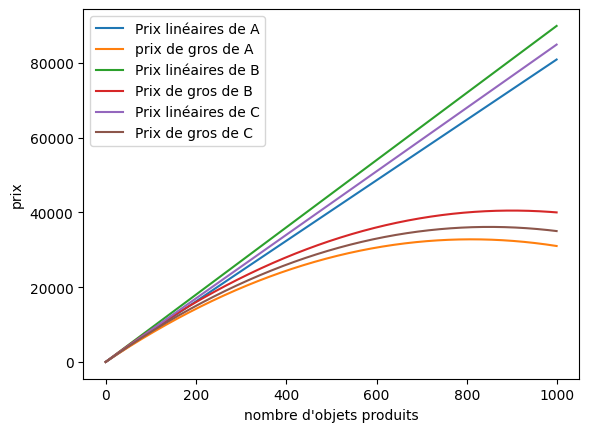

In [ ]:
import matplotlib.pyplot as plt
import math

# On définit l'étendue (range)
x_cords = range(0,1000)

# On définit les fonctions.
prix_lineaires_objet_A = [x * 81 for x in x_cords] 
prix_non_lineaires_objet_A = [x * ( 81 - x / 20) for x in x_cords] 

prix_lineaires_objet_B = [x * 90 for x in x_cords] 
prix_non_lineaires_objet_B = [x * ( 90 - x / 20) for x in x_cords] 

prix_lineaires_objet_C = [x * 85 for x in x_cords] 
prix_non_lineaires_objet_C = [x * ( 85 - x / 20) for x in x_cords] 

# On trace
plt.plot(x_cords,prix_lineaires_objet_A, label="Prix linéaires de A")
plt.plot(x_cords,prix_non_lineaires_objet_A, label="prix de gros de A")

plt.plot(x_cords,prix_lineaires_objet_B, label="Prix linéaires de B")
plt.plot(x_cords,prix_non_lineaires_objet_B, label="Prix de gros de B")

plt.plot(x_cords,prix_lineaires_objet_C, label="Prix linéaires de C")
plt.plot(x_cords,prix_non_lineaires_objet_C, label="Prix de gros de C")

plt.xlabel("nombre d'objets produits")
plt.ylabel("prix")
plt.legend(loc="upper left")
plt.show()

# Modélisation mathématique

A venir !

# Résoudre l'optimisation avec le solveur Gekko.

On utilise Gekko, le solveur non linéaire.

In [ ]:
# On importe Gekko
from gekko import GEKKO

m = GEKKO(remote=False) # Initialize gekko

#The example problem that you referenced uses the default IPOPT solver. To get a binary or integer solution, switch to the APOPT solver.
m.options.SOLVER = 1

In [ ]:
# On crée les variables de décision , ce sera notre nombre de pièces à réaliser, vu qu'on ne 
# peut pas avoir 1/2 objet, on dit que ce sont des variables entières.

A = m.Var(value=1,lb=0,ub=10000,integer=True)
B = m.Var(value=1,lb=0,ub=10000,integer=True)
C = m.Var(value=1,lb=0,ub=10000,integer=True)

# contraintes
m.Equation( A + B + C <= 1000) # La machine un peut produire 1000 objets maximum


# Voici notre fonction objectif , qui tient compte du fait que plus on produits de pièces, Moins ça coute cher !!
# On voit qu'elle est non linéaire parce que A , B et C sont élevés au carré !!
m.Maximize( A * (81 - ( A / 20  )) + B * (90 - (B / 20)) + C * (85 - (C / 20)))



In [ ]:
# On imprime le résultat 
m.options.IMODE = 3 # Steady state optimization

m.solve(disp=False) # Solve

print('Solution')

print('A: ' + str(A.value))
print('B: ' + str(B.value))
print('C: ' + str(C.value))

print('Objectif: ' + str(-m.options.objfcnval))

Solution
A: [290.0]
B: [380.0]
C: [330.0]
Objectif: 68870.0


# Le solveur Cplex trouve-t il les mêmes solutions ?

Oui ! Il trouve la même solution !


In [ ]:
import cplex
import docplex.mp
from docplex.mp.model import Model
from docplex.util.environment import get_environment

# On crée notre modèle
model = Model(name='maximisation_de_profit_non_lineaire', log_output=True)

# On crée nos variables de décision
A = model.integer_var(name='A')
B = model.integer_var(name='B')
C = model.integer_var(name='C')

# On crée la fonction objectif
model.maximize(A * (81 - ( A / 20  )) + B * (90 - (B / 20)) + C * (85 - (C / 20))) 

# On crée les contraintes
model.add_constraint(A + B + C <= 1000)

# Résoudre
model.parameters.mip.display.set(0)
sol_model = model.solve()
model.print_solution()

Version identifier: 22.1.0.0 | 2022-03-25 | 54982fbec
CPXPARAM_Read_DataCheck                          1
CPXPARAM_MIP_Display                             0
objective: 68870.000
status: OPTIMAL_SOLUTION(2)
  A=290
  B=380
  C=330
